# Notebook 02 - Bedrooms data cleaning and fixing

## Objectives
* Clean data
* Evaluate and process missing data
* Fix potential issues with data in feature (BedroomAbvGr)

## Inputs
* inputs/datasets/cleaning/floors.csv

## Outputs
* Clean and fix (missing and potentially wrong) data in given column
* After cleaning is completed, we will save current dataset in inputs/datasets/cleaning/bedrooms.csv

## Change working directory
In This section we will get location of current directory and move one step up, to parent folder, so App will be accessing project folder.

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/pecukevicius/DataspellProjects/heritage_houses_p5/jupyter_notebooks/data_cleaning'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chdir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("you have set a new current directory")

you have set a new current directory


Confirm new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/pecukevicius/DataspellProjects/heritage_houses_p5/jupyter_notebooks'

We need to check current working directory

In [4]:
current_dir

'/Users/pecukevicius/DataspellProjects/heritage_houses_p5/jupyter_notebooks'

We can see that current is **jupyter_notebooks**, as current notebook is in subfolder. We will go one step up to parent directory, what will be our project main directory.
Print out to confirm working directory

In [5]:
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
current_dir

'/Users/pecukevicius/DataspellProjects/heritage_houses_p5'

## Loading Dataset

In [6]:
import pandas as pd

df = pd.read_csv("inputs/datasets/cleaning/floors.csv")
df.head()

,Unnamed: 0,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,0,856,854,3.0,No,706,GLQ,150,0.0,548,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1,1262,0,3.0,Gd,978,ALQ,284,NaN,460,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,2,920,866,3.0,Mn,486,GLQ,434,0.0,608,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,3,961,0,NaN,No,216,ALQ,540,NaN,642,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,4,1145,0,4.0,Av,655,GLQ,490,0.0,836,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


## Exploring Data

We check for missing data, it is we will replace with 0

In [7]:
df['BedroomAbvGr'] = df['BedroomAbvGr'].fillna(0)

We need to convert it to integer

In [8]:
df['BedroomAbvGr'] = df['BedroomAbvGr'].astype('int')

Checking is there any buildings, where bedrooms quantity is 0, as it is very unlikely to build house and no bedrooms


In [9]:
issues_bedrooms = df[df['BedroomAbvGr'] == 0]
issues_bedrooms

,Unnamed: 0,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
3,3,961,0,0,No,216,ALQ,540,NaN,642,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
14,14,1253,0,0,No,733,BLQ,520,NaN,352,...,NaN,212.0,213,5,6,1253,NaN,1960,1960,157000
18,18,1114,0,0,No,646,GLQ,468,NaN,576,...,66.0,0.0,102,5,5,1114,NaN,2004,2004,159000
37,37,1297,0,0,No,1213,Rec,84,0.0,498,...,74.0,650.0,0,6,5,1297,NaN,1954,1990,153000
39,39,1152,0,0,NaN,0,NaN,0,NaN,0,...,65.0,0.0,0,5,4,0,NaN,1955,1955,82000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361,1361,1530,0,0,Av,1274,ALQ,256,NaN,430,...,124.0,16.0,36,5,7,1530,NaN,2005,2005,260000
1372,1372,1108,989,0,Av,975,GLQ,133,NaN,583,...,75.0,0.0,170,6,7,1108,NaN,1998,1998,274300
1394,1394,1500,0,0,Av,1070,GLQ,286,NaN,648,...,53.0,45.0,20,5,7,1356,NaN,2006,2006,246578
1428,1428,804,0,0,No,510,BLQ,278,NaN,240,...,60.0,294.0,0,7,5,788,NaN,1940,1992,119000


We have 105 records, where building has no bedrooms.

Before we proceed, we expect:
1. All houses with NO 2nd floor, we expect to be at least 1 bedroom
2. All houses with 2nd floor, we expect to be at least 2 bedrooms

Based on our expectations we will:
* get mean of bedrooms quantity of all houses with NO 2nd floor
* get mean of bedrooms of all houses with 2nd floor
* get mean of bedrooms in all houses (just to have basic picture)

In [10]:
print("Mean of bedrooms in houses with NO 2nd floor is:", df.loc[df['2ndFlrSF'] == 0, 'BedroomAbvGr'].mean())
print("Mean of bedrooms in houses with  2nd floor is:", df.loc[df['2ndFlrSF'] > 0, 'BedroomAbvGr'].mean())
print("Mean of bedrooms in houses with NO 2nd floor is:", df['BedroomAbvGr'].mean())


Mean of bedrooms in houses with NO 2nd floor is: 2.4313725490196076
Mean of bedrooms in houses with  2nd floor is: 3.03035413153457
Mean of bedrooms in houses with NO 2nd floor is: 2.6746575342465753


We can see that in average all houses has minimum 2 rooms, if there is 2nd floor, then it is 3

Let's try to see how bedrooms are distributed across buildings (we compare bedrooms qty and GrLivArea - total living area)

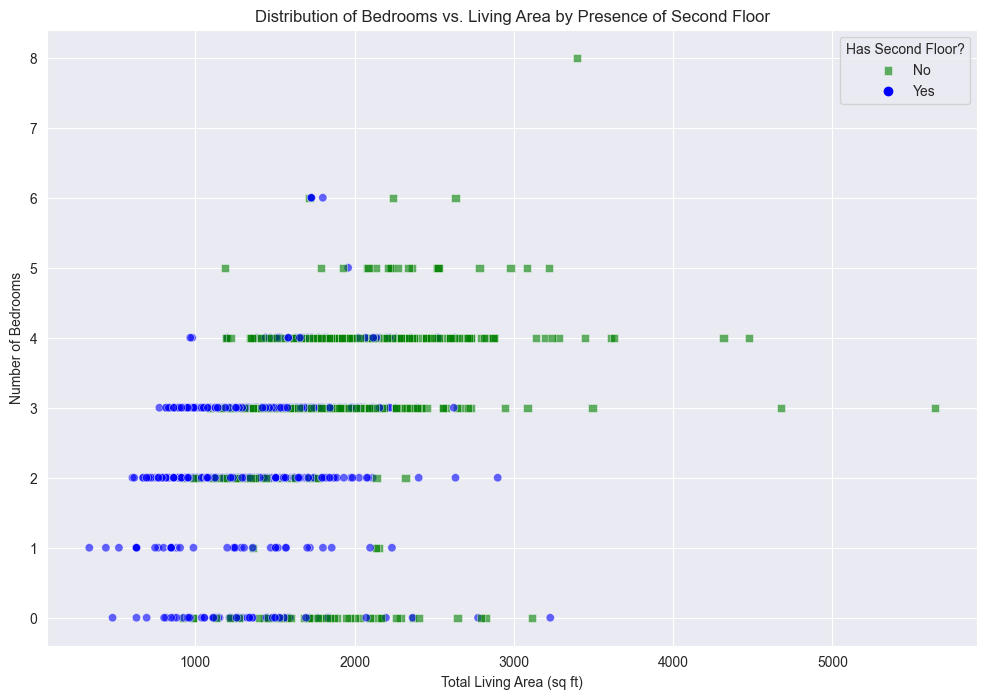

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Has_2nd_Floor'] = (df['2ndFlrSF'] > 0).astype(int)  # 1 if there's a second floor, 0 otherwise

plt.figure(figsize=(12, 8))
sns.scatterplot(x='GrLivArea', y='BedroomAbvGr', hue='Has_2nd_Floor', data=df, palette={0: 'blue', 1: 'green'},
                style='Has_2nd_Floor', markers=['o', 's'], alpha=0.6)
plt.title('Distribution of Bedrooms vs. Living Area by Presence of Second Floor')
plt.xlabel('Total Living Area (sq ft)')
plt.ylabel('Number of Bedrooms')
plt.legend(title='Has Second Floor?', labels=['No', 'Yes'])
plt.show()

This plot does not give a lots of hints how might bedrooms be distributes across houses based on house living area.
Clusters are not visible, as each room ir has wide range of living area in buildings.

Let's try same plot, but also splitting it into bins (every 1000 square feet)

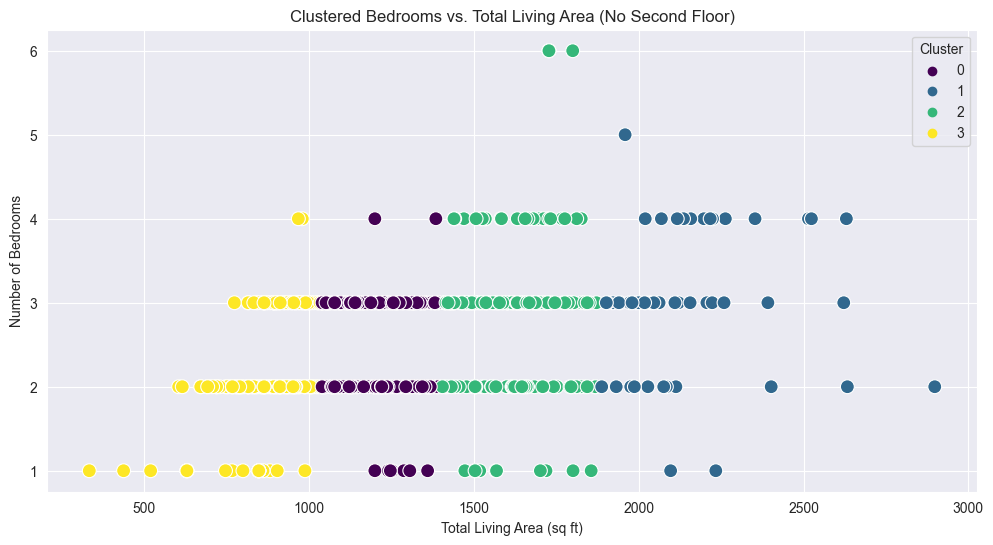

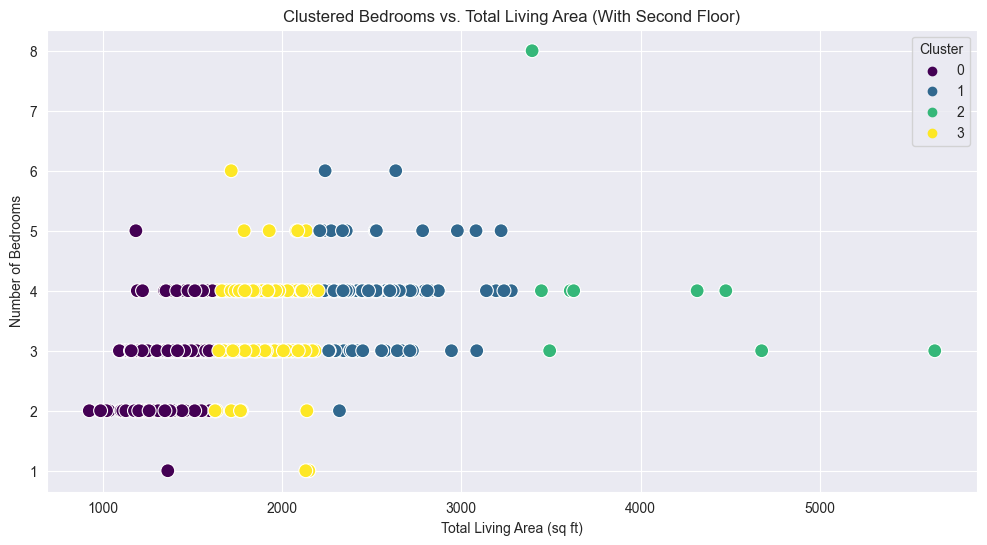

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Splitting dataframe based on whether the house has bedrooms or not
df_with_bedrooms = df[df['BedroomAbvGr'] > 0].copy()

# Split data based on the presence of a second floor
df_no_2nd_floor = df_with_bedrooms[df_with_bedrooms['2ndFlrSF'] == 0].copy()
df_with_2nd_floor = df_with_bedrooms[df_with_bedrooms['2ndFlrSF'] > 0].copy()

# Fit K-Means for houses without a second floor
kmeans_no_2nd_floor = KMeans(n_clusters=4, random_state=0).fit(df_no_2nd_floor[['GrLivArea', 'BedroomAbvGr']])
df_no_2nd_floor['Cluster'] = kmeans_no_2nd_floor.labels_

# Fit K-Means for houses with a second floor
kmeans_with_2nd_floor = KMeans(n_clusters=4, random_state=0).fit(df_with_2nd_floor[['GrLivArea', 'BedroomAbvGr']])
df_with_2nd_floor['Cluster'] = kmeans_with_2nd_floor.labels_

# Plotting houses without a second floor
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_no_2nd_floor, x='GrLivArea', y='BedroomAbvGr', hue='Cluster', palette='viridis', s=100,
                marker='o')
plt.title('Clustered Bedrooms vs. Total Living Area (No Second Floor)')
plt.xlabel('Total Living Area (sq ft)')
plt.ylabel('Number of Bedrooms')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

# Plotting houses with a second floor
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_with_2nd_floor, x='GrLivArea', y='BedroomAbvGr', hue='Cluster', palette='viridis', s=100,
                marker='o')
plt.title('Clustered Bedrooms vs. Total Living Area (With Second Floor)')
plt.xlabel('Total Living Area (sq ft)')
plt.ylabel('Number of Bedrooms')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

## Clustering evaluation using elbow and Silhouette Scores

We will evaluate the optimal number of clusters (if possible) for dataset using distinct methods: Elbow Method and Silhouette Scores.

These methods can help to determinate the most suitable number of clusters by analyzing intra-cluster variation and comparing it against a reference distribution:
* **Elbow Method** - Identifies the point where decrease in the within-cluster sum of squares (inertia) with respect to the number of clusters becomes less pronounced
* **Silhouette Scores** - Measures how similar an object is to its own cluster compared to other clusters. A higher silhouette value indicates that the object is well-matched to its own cluster and poorly matched to neighbouring clusters

To proceed, we need to convert integers to float

In [13]:
df_with_bedrooms['GrLivArea'] = df_with_bedrooms['GrLivArea'].astype(float)
df_with_bedrooms['BedroomAbvGr'] = df_with_bedrooms['BedroomAbvGr'].astype(float)

In [14]:
import numpy as np
from gap_statistic import OptimalK

# Split data based on the presence of a second floor
df_no_2nd_floor = df_with_bedrooms[df_with_bedrooms['2ndFlrSF'] == 0].copy()
df_with_2nd_floor = df_with_bedrooms[df_with_bedrooms['2ndFlrSF'] > 0].copy()


# Function to apply KMeans and calculate the optimal number of clusters using Gap Statistic
def apply_kmeans_and_plot(data, title):
    if data.empty:
        print(f"The DataFrame for {title} is empty. No data to process.")
        return

    try:
        # Ensure that the data frame for clustering has no NaN values
        valid_data = data[['GrLivArea', 'BedroomAbvGr']].dropna()
        if valid_data.empty:
            print(f"No valid data available for clustering in {title}.")
            return

        print(f"Processing {title} with {len(valid_data)} entries.")

        optimalK = OptimalK(parallel_backend=None)
        n_clusters = optimalK(valid_data.to_numpy(), n_refs=10, cluster_array=np.arange(1, 9))

        # Check gap statistics results
        gap_df = optimalK.gap_df
        print(f"Optimal number of clusters for {title}: {n_clusters}")
        print("Gap Statistic Results:")
        print(gap_df)

    except Exception as e:
        print(f"An error occurred while processing {title}: {str(e)}")


# Apply to both dataframes
apply_kmeans_and_plot(df_no_2nd_floor, 'Bedrooms vs. Total Living Area (No Second Floor)')
apply_kmeans_and_plot(df_with_2nd_floor, 'Bedrooms vs. Total Living Area (With Second Floor)')

Processing Bedrooms vs. Total Living Area (No Second Floor) with 806 entries.
Optimal number of clusters for Bedrooms vs. Total Living Area (No Second Floor): 1
Gap Statistic Results:
   n_clusters  gap_value  ref_dispersion_std        sk          gap*  \
0         1.0   1.348016        1.384328e+07  0.032875  3.297069e+08   
1         2.0   1.068037        2.966496e+06  0.029050  7.079949e+07   
2         3.0   0.846660        1.185873e+06  0.025831  2.802375e+07   
3         4.0   0.828820        7.758661e+05  0.029402  1.545146e+07   
4         5.0   0.672270        1.600509e+06  0.087017  8.903814e+06   
5         6.0   0.680390        7.175098e+05  0.060123  6.147393e+06   
6         7.0   0.726423        1.186443e+06  0.115083  5.530300e+06   
7         8.0   0.735715        2.546692e+06  0.250021  4.539721e+06   

            sk*      diff         diff*  
0  3.461042e+08  0.309029  3.332277e+08  
1  7.432029e+07  0.247208  7.219360e+07  
2  2.941786e+07  0.047242  2.879834e+07  

We were right... the best cluster is just one cluster from what we can see.

## Fixing missing data

Knowing that there is just one cluster, we can apply mean numbers for each type of building:
1. Bedrooms with NO 2nd floor mean for bedrooms quantity is 2.43
2. Bedrooms with 2nd floor mean for bedrooms quantity is 3.03

Based on this information each building with no bedrooms will receive 2 or 3 bedrooms accordingly 

In [15]:
df.loc[(df['2ndFlrSF'] == 0) & (df['BedroomAbvGr'] == 0), 'BedroomAbvGr'] = 2
df.loc[(df['2ndFlrSF'] > 0) & (df['BedroomAbvGr'] == 0), 'BedroomAbvGr'] = 3

## Removing any extra columns we have created in dataframe

In [16]:
# Importing original dataset
df_original = pd.read_csv('outputs/datasets/collection/HousePricesRecords.csv')

# Identify features that are in current and original datasets
matching_features = df.columns.intersection(df_original.columns)

# Applying just existing features, remaining will be discarded
df = df[matching_features]

df.head()

,Unnamed: 0,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,0,856,854,3,No,706,GLQ,150,0.0,548,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1,1262,0,3,Gd,978,ALQ,284,NaN,460,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,2,920,866,3,Mn,486,GLQ,434,0.0,608,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,3,961,0,2,No,216,ALQ,540,NaN,642,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,4,1145,0,4,Av,655,GLQ,490,0.0,836,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


## Saving given dataframe

We will save dataframe at this point as inputs/datasets/cleaning/bedrooms.csv

In [17]:
df.to_csv('inputs/datasets/cleaning/bedrooms.csv', index=False)

### Adding code to cleaning pipeline

```python
import pandas as pd

def adjust_bedroom_counts(df):
    """
    Adjusts bedroom counts based on the presence of a second floor.

    Parameters:
    df (DataFrame): The DataFrame to modify.

    Returns:
    DataFrame: The DataFrame with adjusted bedroom counts.
    """
    df['BedroomAbvGr'] = df['BedroomAbvGr'].astype('int')
    df.loc[(df['2ndFlrSF'] == 0) & (df['BedroomAbvGr'] == 0), 'BedroomAbvGr'] = 2
    df.loc[(df['2ndFlrSF'] > 0) & (df['BedroomAbvGr'] == 0), 'BedroomAbvGr'] = 3
    return df

def synchronize_datasets(df, dataset_path):
    """
    Loads an original dataset and synchronizes the features with the current DataFrame.

    Args:
    df (DataFrame): The current pandas DataFrame.
    dataset_path (str): Path to the original dataset CSV file.

    Returns:
    DataFrame: The synchronized DataFrame with matching features only.
    """
    df_original = pd.read_csv(dataset_path)
    matching_features = df.columns.intersection(df_original.columns)
    return df[matching_features]

# Synchronize with an original dataset and display the first few rows
df = synchronize_datasets(df, 'outputs/datasets/collection/HousePricesRecords.csv')
print(df.head())
```


## Next step is cleaning all basement features